In [65]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

In [66]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()

In [67]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [68]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [69]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,NaN,NaN,37605,0,0,0,0,0,3,2.9,...,506,199,510,202,4.0,,NaN,,NaN,
1,0.0,0.0,39476,0,0,0,0,0,2,0.0,...,303,136,358,148,NaN,,NaN,,NaN,
2,0.0,0.0,41270,0,0,0,0,0,2,0.0,...,405,173,429,177,NaN,,4.0,,NaN,
3,NaN,NaN,54694,0,0,0,0,0,3,4.5,...,8,4,7,4,NaN,,6.0,,1.0,
4,NaN,NaN,58822,0,0,0,0,0,2,2.6,...,318,141,369,152,NaN,,NaN,,NaN,


In [70]:
elements_types_df.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],55
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],193
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],216
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],65


In [71]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [72]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes',
                                'transfers_in','value_season','total_points','bonus', 'bps', 'influence', 'creativity',
                                'threat', 'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank']]
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank
0,Özil,1,3,1.2,70,0,619,0.0,0,0,0,0.0,0.0,0.0,0.0,510,202,510
1,Papastathopoulos,1,2,0.2,50,0,29,0.0,0,0,0,0.0,0.0,0.0,0.0,351,148,345
2,Luiz Moreira Marinho,1,2,0.9,55,0,267,0.0,0,0,0,0.0,0.0,0.0,0.0,424,177,428
3,Aubameyang,1,3,46.8,120,90,52460,0.6,7,0,19,36.6,15.3,54.0,10.6,23,8,49
4,Soares,1,2,0.5,50,0,400,0.0,0,0,0,0.0,0.0,0.0,0.0,362,152,357


In [73]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
slim_elements_df.head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,position
0,Özil,1,3,1.2,70,0,619,0.0,0,0,0,0.0,0.0,0.0,0.0,510,202,510,Midfielder
1,Papastathopoulos,1,2,0.2,50,0,29,0.0,0,0,0,0.0,0.0,0.0,0.0,351,148,345,Defender
2,Luiz Moreira Marinho,1,2,0.9,55,0,267,0.0,0,0,0,0.0,0.0,0.0,0.0,424,177,428,Defender
3,Aubameyang,1,3,46.8,120,90,52460,0.6,7,0,19,36.6,15.3,54.0,10.6,23,8,49,Midfielder
4,Soares,1,2,0.5,50,0,400,0.0,0,0,0,0.0,0.0,0.0,0.0,362,152,357,Defender


In [74]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)
slim_elements_df.head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,position
0,Özil,Arsenal,3,1.2,70,0,619,0.0,0,0,0,0.0,0.0,0.0,0.0,510,202,510,Midfielder
1,Papastathopoulos,Arsenal,2,0.2,50,0,29,0.0,0,0,0,0.0,0.0,0.0,0.0,351,148,345,Defender
2,Luiz Moreira Marinho,Arsenal,2,0.9,55,0,267,0.0,0,0,0,0.0,0.0,0.0,0.0,424,177,428,Defender
3,Aubameyang,Arsenal,3,46.8,120,90,52460,0.6,7,0,19,36.6,15.3,54.0,10.6,23,8,49,Midfielder
4,Soares,Arsenal,2,0.5,50,0,400,0.0,0,0,0,0.0,0.0,0.0,0.0,362,152,357,Defender


In [75]:
slim_elements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   second_name          529 non-null    object
 1   team                 529 non-null    object
 2   element_type         529 non-null    int64 
 3   selected_by_percent  529 non-null    object
 4   now_cost             529 non-null    int64 
 5   minutes              529 non-null    int64 
 6   transfers_in         529 non-null    int64 
 7   value_season         529 non-null    object
 8   total_points         529 non-null    int64 
 9   bonus                529 non-null    int64 
 10  bps                  529 non-null    int64 
 11  influence            529 non-null    object
 12  creativity           529 non-null    object
 13  threat               529 non-null    object
 14  ict_index            529 non-null    object
 15  influence_rank       529 non-null    int64 
 16  influenc

In [76]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)
slim_elements_df['threat'] = slim_elements_df.threat.astype(float)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,position,value
0,Özil,Arsenal,3,1.2,70,0,619,0.0,0,0,0,0.0,0.0,0.0,0.0,510,202,510,Midfielder,0.0
1,Papastathopoulos,Arsenal,2,0.2,50,0,29,0.0,0,0,0,0.0,0.0,0.0,0.0,351,148,345,Defender,0.0
2,Luiz Moreira Marinho,Arsenal,2,0.9,55,0,267,0.0,0,0,0,0.0,0.0,0.0,0.0,424,177,428,Defender,0.0
3,Aubameyang,Arsenal,3,46.8,120,90,52460,0.6,7,0,19,36.6,15.3,54.0,10.6,23,8,49,Midfielder,0.6
4,Soares,Arsenal,2,0.5,50,0,400,0.0,0,0,0,0.0,0.0,0.0,0.0,362,152,357,Defender,0.0


In [46]:
slim_elements_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,position,value
510,Saïss,Wolves,2,3.8,50,90,50637,3.0,15,3,34,63.4,0.2,38.0,10.2,5,2,192,Defender,3.0
28,Magalhães,Arsenal,2,6.7,50,90,201960,3.0,15,3,37,51.8,0.3,33.0,8.5,9,4,182,Defender,3.0
131,James,Chelsea,2,6.6,50,90,85252,2.8,14,3,44,76.8,30.3,11.0,11.8,2,1,16,Defender,2.8
372,Hendrick,Newcastle,3,2.2,50,90,93593,2.8,14,3,41,67.0,13.4,23.0,10.3,4,2,57,Midfielder,2.8
241,Castagne,Leicester,2,2.9,55,90,69479,2.5,14,2,38,45.8,3.0,35.0,8.4,10,5,112,Defender,2.5
114,Frello Filho,Chelsea,3,2.7,50,84,47755,2.4,12,2,43,60.8,23.2,17.0,10.1,6,3,27,Midfielder,2.4
170,Digne,Everton,2,9.5,60,90,114970,2.0,12,3,38,40.8,19.9,0.0,6.1,15,7,32,Defender,2.0
140,Guaita,Crystal Palace,1,2.5,50,90,23812,2.0,10,3,31,41.4,0.0,0.0,4.1,12,1,347,Goalkeeper,2.0
239,Justin,Leicester,2,14.0,45,90,139767,2.0,9,1,32,20.0,13.0,2.0,3.5,57,28,60,Defender,2.0
27,Borges Da Silva,Arsenal,3,13.0,81,74,220589,1.7,14,2,35,38.6,38.0,38.0,11.5,19,7,10,Midfielder,1.7


In [47]:
pivot=slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
0,Defender,0.262176
3,Midfielder,0.237037
2,Goalkeeper,0.209091
1,Forward,0.187692


In [48]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
0,Defender,0.816129
2,Goalkeeper,0.718750
3,Midfielder,0.487619
1,Forward,0.406667


In [49]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)


,team,value
0,Arsenal,0.985714
9,Newcastle,0.964286
15,Wolves,0.935714
7,Leicester,0.930769
3,Crystal Palace,0.876923
4,Everton,0.771429
2,Chelsea,0.728571
6,Leeds,0.709091
8,Liverpool,0.450000
1,Brighton,0.364286


In [78]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

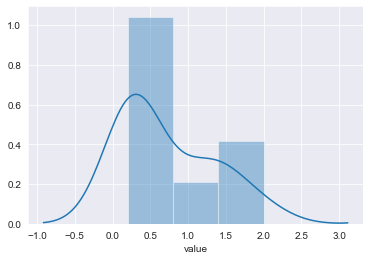

In [51]:
sns.distplot(goal_df.value)

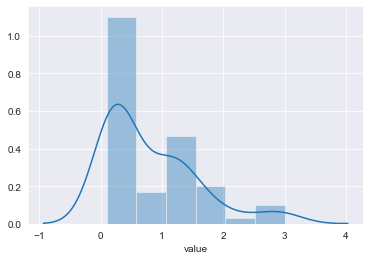

In [52]:
sns.distplot(def_df.value)

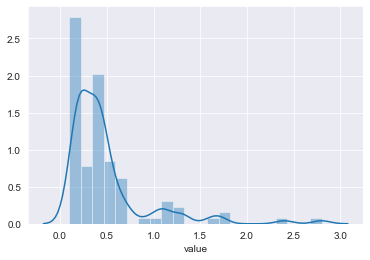

In [53]:
sns.distplot(mid_df.value)

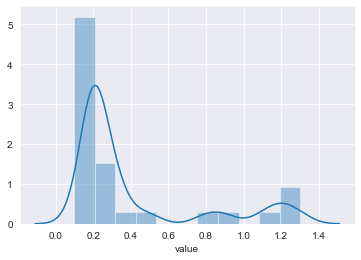

In [54]:
sns.distplot(fwd_df.value)

In [55]:
def_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,position,value
28,Magalhães,Arsenal,2,6.7,50,90,201960,3.0,15,3,37,51.8,0.3,33.0,8.5,9,4,182,Defender,3.0
510,Saïss,Wolves,2,3.8,50,90,50637,3.0,15,3,34,63.4,0.2,38.0,10.2,5,2,192,Defender,3.0
131,James,Chelsea,2,6.6,50,90,85252,2.8,14,3,44,76.8,30.3,11.0,11.8,2,1,16,Defender,2.8
241,Castagne,Leicester,2,2.9,55,90,69479,2.5,14,2,38,45.8,3.0,35.0,8.4,10,5,112,Defender,2.5
170,Digne,Everton,2,9.5,60,90,114970,2.0,12,3,38,40.8,19.9,0.0,6.1,15,7,32,Defender,2.0
239,Justin,Leicester,2,14.0,45,90,139767,2.0,9,1,32,20.0,13.0,2.0,3.5,57,28,60,Defender,2.0
508,Coady,Wolves,2,9.4,50,90,17068,1.6,8,2,29,22.0,0.0,0.0,2.2,49,22,373,Defender,1.6
378,Lewis,Newcastle,2,2.6,45,90,58466,1.6,7,1,31,19.4,39.8,0.0,5.9,62,31,9,Defender,1.6
160,Dann,Crystal Palace,2,1.0,45,90,18409,1.6,7,1,24,15.6,0.4,8.0,2.4,87,44,174,Defender,1.6
118,Zouma,Chelsea,2,1.1,50,90,5951,1.6,8,0,25,51.8,0.2,17.0,6.9,8,3,191,Defender,1.6


In [82]:
mid_df.sort_values('threat',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,position,value
281,Salah,Liverpool,3,35.6,120,90,175758,1.7,20,3,69,117.2,50.1,161.0,32.8,1,1,3,Midfielder,1.7
278,Mané,Liverpool,3,11.2,120,90,4553,0.2,2,0,14,13.2,45.5,75.0,13.4,105,37,6,Midfielder,0.2
235,Barnes,Leicester,3,4.0,70,90,7192,0.4,3,0,8,18.0,18.3,66.0,10.2,70,21,38,Midfielder,0.4
3,Aubameyang,Arsenal,3,46.8,120,90,52460,0.6,7,0,19,36.6,15.3,54.0,10.6,23,8,49,Midfielder,0.6
499,Soucek,West Ham,3,5.7,50,90,6120,0.4,2,0,7,12.4,21.6,46.0,8.0,111,42,31,Midfielder,0.4
27,Borges Da Silva,Arsenal,3,13.0,81,74,222783,1.7,14,2,35,38.6,38.0,38.0,11.5,19,7,10,Midfielder,1.7
434,Son,Spurs,3,25.4,90,90,24210,0.2,2,0,10,14.0,46.8,35.0,9.6,98,33,5,Midfielder,0.2
270,Wijnaldum,Liverpool,3,2.1,55,90,4241,0.4,2,0,9,15.8,23.0,35.0,7.4,86,27,28,Midfielder,0.4
436,Rodrigues Moura da Silva,Spurs,3,2.5,70,90,5184,0.3,2,0,-1,2.8,5.8,35.0,4.4,180,82,93,Midfielder,0.3
226,Praet,Leicester,3,0.2,55,74,5228,1.1,6,0,25,27.8,16.8,33.0,7.8,32,12,43,Midfielder,1.1


In [81]:
goal_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,position,value
140,Guaita,Crystal Palace,1,2.5,50,90,24100,2.0,10,3,31,41.4,0.0,0.0,4.1,12,1,347,Goalkeeper,2.0
172,Pickford,Everton,1,6.8,50,90,78651,1.6,8,1,32,38.6,0.0,0.0,3.9,18,2,379,Goalkeeper,1.6
7,Leno,Arsenal,1,8.6,50,90,54727,1.4,7,1,29,14.0,0.0,0.0,1.4,96,10,368,Goalkeeper,1.4
353,Darlow,Newcastle,1,0.4,50,90,4902,1.4,7,0,26,27.0,0.0,0.0,2.7,34,4,359,Goalkeeper,1.4
505,dos Santos Patrício,Wolves,1,6.4,55,90,7846,1.1,6,0,23,11.2,0.0,0.0,1.1,117,13,427,Goalkeeper,1.1
218,Schmeichel,Leicester,1,14.5,55,90,23655,1.1,6,0,21,12.2,0.0,0.0,1.2,112,11,421,Goalkeeper,1.1
427,Lloris,Spurs,1,5.1,55,90,7095,0.5,3,0,15,20.0,0.0,0.0,2.0,58,6,426,Goalkeeper,0.5
405,McCarthy,Southampton,1,23.1,45,90,37442,0.4,2,0,17,22.6,0.0,0.0,2.3,47,5,253,Goalkeeper,0.4
466,Johnstone,West Brom,1,0.8,45,90,3993,0.4,2,0,16,31.2,0.0,0.0,3.1,29,3,276,Goalkeeper,0.4
120,Arrizabalaga,Chelsea,1,2.3,50,90,5269,0.4,2,0,12,10.4,0.0,0.0,1.0,122,14,378,Goalkeeper,0.4


In [58]:
fwd_df.sort_values('value',ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,position,value
225,Vardy,Leicester,4,20.7,100,90,116578,1.3,13,3,52,71.2,10.3,36.0,11.8,3,1,83,Forward,1.3
376,Wilson,Newcastle,4,12.2,65,84,158724,1.2,8,2,32,32.0,23.3,50.0,10.5,27,6,26,Forward,1.2
252,Bamford,Leeds,4,8.2,56,61,214420,1.2,7,1,28,40.0,0.5,27.0,6.8,17,3,172,Forward,1.2
179,Calvert-Lewin,Everton,4,9.3,70,88,145109,1.1,8,2,34,38.4,13.7,34.0,8.6,21,5,56,Forward,1.1
509,Jiménez,Wolves,4,19.1,85,90,60074,0.9,8,2,29,41.2,8.5,48.0,9.8,13,2,87,Forward,0.9
5,Lacazette,Arsenal,4,4.5,85,86,37878,0.8,7,1,29,38.6,12.7,48.0,9.9,20,4,62,Forward,0.8
125,Werner,Chelsea,4,46.5,95,90,41658,0.5,5,0,10,4.8,11.7,79.0,9.6,163,16,71,Forward,0.5
348,Carroll,Newcastle,4,0.6,55,87,9628,0.4,2,0,3,7.0,14.0,48.0,6.9,148,13,54,Forward,0.4
488,Antonio,West Ham,4,9.5,65,90,10203,0.3,2,0,0,5.4,11.8,63.0,8.0,159,15,70,Forward,0.3
418,Adams,Southampton,4,4.4,60,84,8202,0.3,2,0,3,4.4,13.1,21.0,3.9,168,17,59,Forward,0.3
